Last week, Sat 25/05/2019 in Ivrea (TO) Italy, my best friends Federico and Alexander opened a new shop for $cool clothes$. 
Wishing to contribute to his luck, I am gonna try to use this tool, IBM Watson Studio, and my knowledge, a master degree in Math at the university of Turin, to code (python), discuss (probability and statistics) my 3rd project in the analysis of real data (that we are trying to collect).

You shall come personally to the shop, and contribute to the sample size 

and/or you could comment here and contribute to my training.

From analyzing a toy SIMULATED data set of costumer entrance in a shop we will see:
- 1 an unsupervised learning technique for clustering costumer behavior
- 2 a supervised learning technique for predict costumer expense
- 3 a reinforcement learning network for deciding how long assistant should attend costumer

In [1]:
# The code was removed by Watson Studio for sharing.

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190606205659-0000
KERNEL_ID = 9a6ff781-ecc4-4620-a406-55df71adb782


,costumer_id,entrance_time,entrance_date,costumer_age,costumer_sex,wearing_shoes,is_on_ista,is_on_fb,visit_number,visit_duration,expense,attended_by
0,D,16.52.22,28/05/19,17,M,UNKNOW,YES,YES,1,22,"€ 35,00",EMI
1,A,18.15.28,28/05/19,18,M,UNKOWN,NO,NO,1,36,"€ 45,00",EMI
2,A,13.22.16,28/05/19,15,M,nike,NO,NO,2,48,"€ 22,00",EMI
3,B,17.33.49,28/05/19,16,F,nike,NO,NO,1,60,"€ 25,00",EMI
4,C,16.21.55,28/05/19,16,F,adidas,YES,YES,1,55,"€ 16,00",EMI


In [2]:
arr = df.values
# extract expense from string
expFloat = df['expense'].apply(lambda x:float(x[1:].split(',')[0]))
expArr = np.array(expFloat)
ageArr = np.array(df['costumer_age'])
visitArr = np.array(df['visit_duration'])

${\huge{Point}} {\huge{1}}$ 

On $\Omega$ are defined:

In [3]:
n_features = len(df.columns)
print('p=', n_features)

p= 12


Random Variables R.V. THAT WE WILL CONSIDER INDEPENDENT!

${\LARGE{THEORY}}$ What does it mean cluster the data? 

1 -  define some measure on the codomain of the R.V. selected. Here we used 3 continuous R.V. (for simplicity) i.e.

${\bf{X}}$: from $\Omega$ to $R^3$ with the Euclidian distance.

2 - Identify all $\omega \in \Omega$ whose image is 'similar' and embed them into $\Omega_{cluster}$ to each others but different from all others. We use k-means.

3 - ${\textit{Partition}}$ $\Omega$ in $\cup\Omega_{cluster}$

We made 4 clusters since I generated the data and knew it the ground truth.

${\LARGE{HEURISTICS}}$:
What is good for?

We could divide our original sample space in smaller, disjoint set, thus definine a sub populations without asking information to the data.. And then perform for example classical statistics on those, ${\textit{or tell them whom to vote for}}$.

${\large{INSIGHT:}}$

If we define a $latent$ categorical R.V. $I$, called for example 'label' or 'clustership' on each $\omega \in \Omega$, so that ${\bf{X}}$ write now $({\bf{X}},I)$ or ${\bf{X}}_I$ and say that $I$ takes values in $n$ classes, we could conceive this variable as a projection from the original sample space $\Omega$ into sub-populations (sub-spaces), $\Omega_i$, $i=1,...,n$. These form a partition of the original $\Omega$.

Kmeans algorithm seeks to minizimize the INERTIA for a fixed number of clusters $n$. Is this equivalent to find the partition $\{\Omega_i$, $i=1,...,n\}$. that maximize the $F$ factor of ANOVA computed on the R.V.  ${\bf{X}_i}$, $i=1,...,n$ ({\small{to show this one first writes down the definition, then expand the squares and add subtract something and finally use the assumption of independency to..}. Are there any difference with the EXPECTATION MAXIMIZATION ALGORITHM?





${\large{Actuality}}$

If you sell the same wine in bottles of different shapes, only an expert in wine will be able to recognize that he is drinking the same wine after he bought the second, or third bottle.

In [4]:
### Unsupervised leanring: kmeans
def handKmeans(x, n_clusters, n_iter, initCentroid = None): # raw
    n_samples, n_features = x.shape
    distances = np.zeros((n_samples, n_clusters)) 
    # random initialization of cluster centers
    if initCentroid is None:
        a=np.min(x.T, axis=1)
        b=np.max(x.T, axis=1)
        initCentroids = np.zeros((n_clusters, n_features))
        for c in range(n_clusters):
            initCentroids[c] = np.random.uniform(a,b)
    centroids = initCentroids
    # start learning
    for i in range(n_iter):
        # step1. compute distances form centroids
        for c in range(n_clusters):
            distances[:,c] = np.sum((x - centroids[c])**2, axis=1)
        #  step2. assign samples to clusters
        labels = np.argmin(distances,axis=1)
        #  step3. recompute centroids
        for c in range(n_clusters):
            centroids[c] = np.mean(x[labels==c],axis=0)

    return centroids, labels, initCentroids

from sklearn.cluster import KMeans # or imported

sklearn took 0:00:00.035320
cell above took -1 day, 23:59:59.921338
0 [ 44.85714286  23.57142857 310.38095238]
0 [nan nan nan]
1 [ 45.72727273  20.27272727 543.75757576]
1 [ 32.54166667  22.83333333 257.84166667]
2 [19.64864865 29.43243243 59.43243243]
2 [nan nan nan]
3 [ 25.06896552  16.79310345 147.5862069 ]
3 [nan nan nan]


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


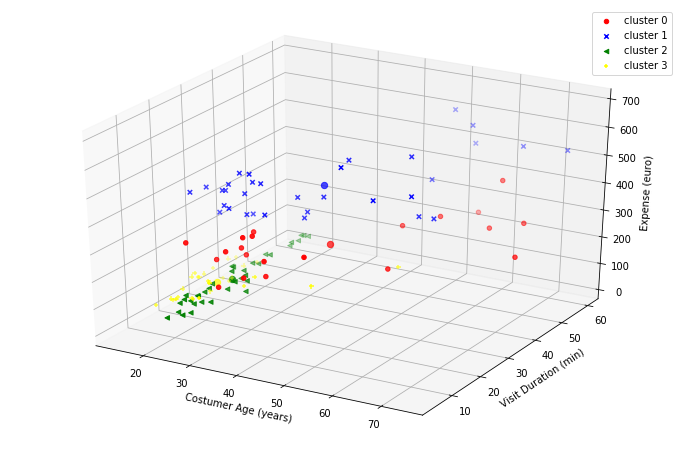

In [5]:
''' Unsupervised Learning '''
# compute kmeans with sklearn library
now = datetime.datetime.now()
n_clusters = 4 
# Def: X is a random vector on Omega, X=x a sample of n_samples observations.
x = np.vstack((ageArr, visitArr, expArr)).T
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
now1 = datetime.datetime.now() 
print('sklearn took', now1-now)

now2 = datetime.datetime.now()
centroids, clusterMembership, initCentroid = handKmeans(x, n_clusters, 500, initCentroid = None)
now3 = datetime.datetime.now()
print('cell above took', now2-now3)


fig1 = plt.figure(figsize=(12,8))
colors = ['red','blue','green','yellow']
markers = ['o', 'x', '<', '+']
axk = fig1.add_subplot(111, projection='3d')#,aspect=True)
# Plot clusters
for i in range(n_clusters):
    axk.scatter(ageArr[np.where(kmeans.labels_==i)[0]], visitArr[np.where(kmeans.labels_==i)[0]], expArr[np.where(kmeans.labels_==i)[0]], marker=markers[i], color=colors[i], label = 'cluster {}'.format(i))
    print(i, kmeans.cluster_centers_[i])
    print(i, centroids[i])
    axk.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], kmeans.cluster_centers_[i][2], color=colors[i], s=40, marker='o', alpha=0.7)   
# Others
axk.set_xlabel('Costumer Age (years)')
axk.set_ylabel('Visit Duration (min)')
axk.set_zlabel('Expense (euro)')
plt.legend()

In [6]:
### Supervised Learning: pearson rho
def handPearson(x, y): # raw
    return np.sum((x-np.mean(x))*(y-np.mean(y))) /  np.sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))

import scipy # or imported

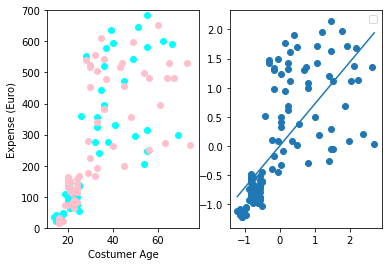

In [10]:
''' Supervised Learning '''
# compute corr
ageNorm = (ageArr - np.mean(ageArr))/np.std(ageArr)
expNorm = (expArr - np.mean(expArr))/np.std(expArr)
r, p = scipy.stats.pearsonr(ageNorm, expNorm)
x = np.linspace(min(ageNorm), max(ageNorm),100)
y =  x*r + np.mean(expNorm) - r*np.mean(ageNorm)


fig2 = plt.figure(figsize=(6,4))
ax = fig2.add_subplot(121)#, projection='3d',aspect=True)
ax.scatter(df['costumer_age'].where(df.costumer_sex=='M'), expFloat.where(df.costumer_sex=='M'), marker='o', color='cyan',label='M')    
ax.scatter(df['costumer_age'].where(df.costumer_sex=='F'), expFloat.where(df.costumer_sex=='F'), marker='o', color='pink',label='F') 
# Plot regression line
axr = fig2.add_subplot(122)#, projection='3d',aspect=True)
axr.scatter(ageNorm, expNorm)
axr.plot(x, y)
# Other  
ax.set_xlabel('Costumer Age')
ax.set_ylabel('Expense (Euro)')
ax.set_ylim([0,700])
plt.legend()

${\huge{Point}} {\huge{2}}$ 

${\LARGE{𝐻𝐸𝑈𝑅𝐼𝑆𝑇𝐼𝐶𝑆}}$ Careful with the interpretation.

This does not mean they spend more because they are older, in principle it might be that ${\textit{they are older since they spend more}}$.

Correlation does not tell notihng about  any relation of causality. 

It actually tell us about relation of dependency, when is different from 0.

$REMARK$: when is 0 independency follows ONLY under Gaussian assumption.


${\LARGE{THEORY}}$

1 - We define $X,Y$ the R.V. expense and age, respectively, going from $\Omega$ to $\mathbb{R}^+$.

2 - We wish to predict $Y$ $(=f(X)$) after having observed $X$. Under the following assumptions, as stated at pag.47 of:

${\small{Hastie, T., Tibshirani, R., \& Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction, Springer Series in Statistics.}}$


   a) - The conditional expectation of $Y$ is linear in $X$;
   
   b) - deviation of $Y$ form its expectation are Addittive and Gaussian;
   
   c) the former writes as $Y=\mathbb{E}(Y|X)+\epsilon=\beta_0+\beta_1\cdot X+\epsilon$, the latter as: $\epsilon \sim \mathcal{N}(0,\sigma^2)$
   
3 -  Regression coef. $\beta_i$ are inferred via least squared error. In fact, by an extimetor of the pearson correlation coefficient.

${\huge{Point}} {\huge{3}}$ 

${\LARGE{𝐻𝐸𝑈𝑅𝐼𝑆𝑇𝐼𝐶𝑆}}$ First $predict$ and then $decide$.

A costumer $\omega$ showing feature $X(\omega)=x$ enters the shop. We might predict its expense $y=f(x)$. We learned from experience that the shop assistant technique, let's call it $T(\omega)=t$, has also an inlfuence on the final expense. Thsu, we could enrich our model writing $y=f(x,t)$.

The core of the rest of the analysis is based on the following: the random variable $T$ is not really random, since it is our own decision. We want use the best technique $T$, and learn this from the other data: $T=g(X,Y)$, or for simplicity $T=g(Y)$.

As an EXAMPLE: $T$ is the time spent to assist a costumer during its visit: $T=1$ the costumer is assisted during the whole visit, $T=0$ costumer is ignored (but when paying!). One can speculate in either way:

1 - $T$ should increase with $Y$ since one need to look after rich costumers and do not lose time with poor ones;

2 - $T$ should decrease with $Y$ since one need to simulate poor costumers to buy, while the rich ones they will anyway buy.